# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">1.5 hours</span>
* A2. Gradient Orientation: <span style="color:red;">20 minutes</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">75 minutes</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">5 minutes</span>
* B. Hough Transform (Circles):  <span style="color:red;">80 minutes</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [65]:
import matplotlib.pyplot as plt
import numpy as np

im1 = plt.imread('2D_White_Box.png', format = "png")

im2 = plt.imread('blocks.png', format = "png")



In [66]:
def threshold(image, value):
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x][y] <= value:
                image[x][y] = 0.0
            else:
                image[x][y] = 1.0
                
            if (x <= 2):
                image[x][y] = 0
            if (x >= image.shape[0] - 2):
                image[x][y] = 0 
            if (y <= 2):
                image[x][y] = 0
            if (y >= image.shape[1] - 2):
                image[x][y] = 0
                
    return image

In [67]:
from scipy import ndimage

def edgeDetect(image):
    result = np.zeros(image.shape)
    resultX = np.zeros(image.shape)
    resultY = np.zeros(image.shape)

    
    kernelX = np.matrix([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])
    
    kernelY = np.matrix([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])
    resultX = ndimage.convolve(image, kernelX)
    resultY = ndimage.convolve(image, kernelY)
    
    result = np.hypot(resultX, resultY)
    result2 = np.arctan2(resultX, resultY)
            
    return result, result2

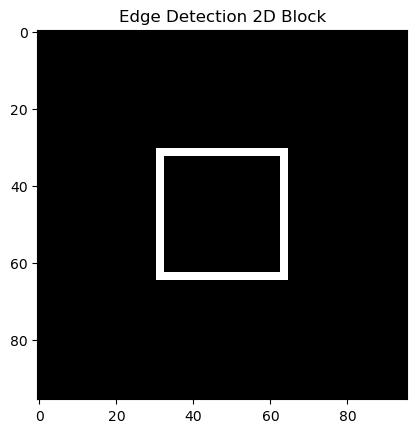

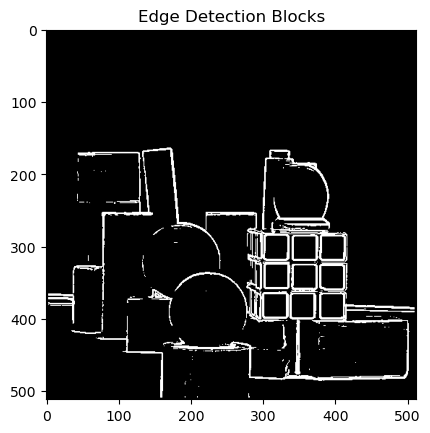

In [68]:
# Part 1. Compute the Gradient Magnitude

magImage, orImage = edgeDetect(im1)
magImage = threshold(magImage, .4)

plt.imshow(magImage,cmap="Greys_r",vmin=0,vmax=1); plt.title("Edge Detection 2D Block")
plt.show()

magImage2, orImage2 = edgeDetect(im2)
magImage2 = threshold(magImage2, .4)
plt.imshow(magImage2,cmap="Greys_r",vmin=0,vmax=1); plt.title("Edge Detection Blocks")
plt.show()

# Show your results on the blocks image


<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

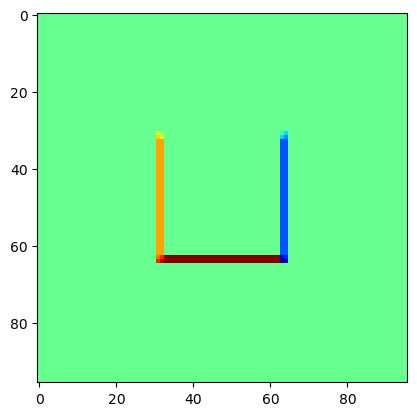

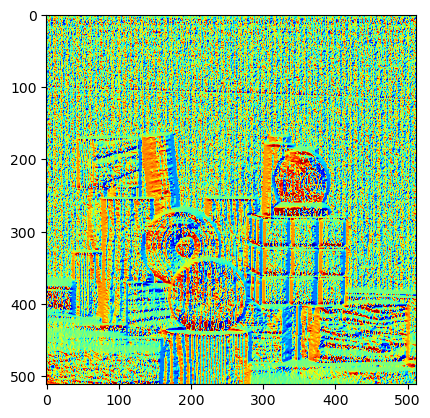

In [69]:
# Part 2. Compute the Gradient Orientation

#plt.imshow(orImage,cmap="Greys_r",vmin=0,vmax=1); plt.title("Gradiant Orientation 2D Block")
plt.imshow(orImage, cmap="jet")
plt.show()

#plt.imshow(orImage2,cmap="Greys_r",vmin=0,vmax=1); plt.title("Gradient Orientation Blocks") 
plt.imshow(orImage2, cmap="jet")
plt.show()

# Show your results on the blocks image


<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



In [70]:
def convertToZeros(image):
    result = np.zeros(image.shape)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x][y] <= 0:
                result[x][y] = 0
            else:
                result[x][y] = 1
    return result

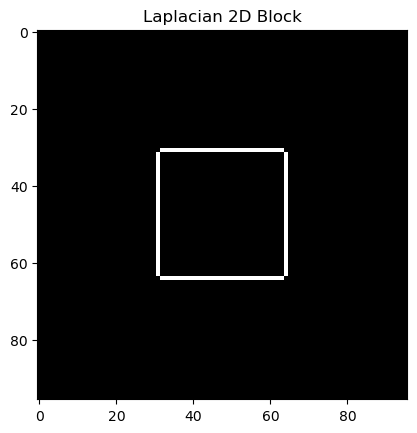

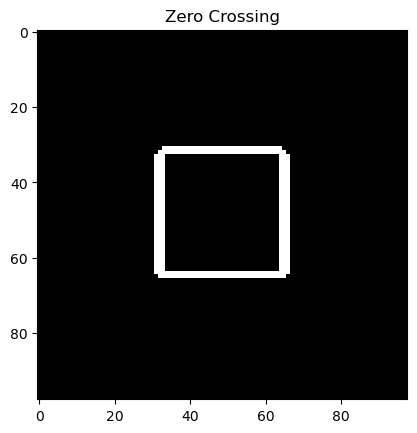

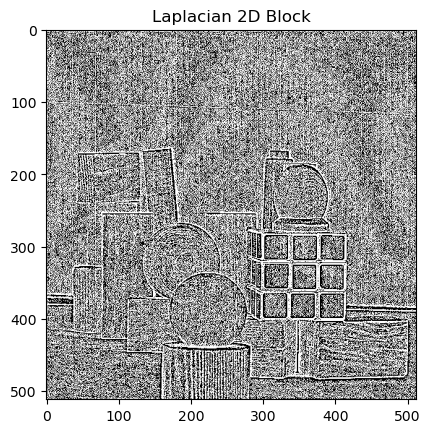

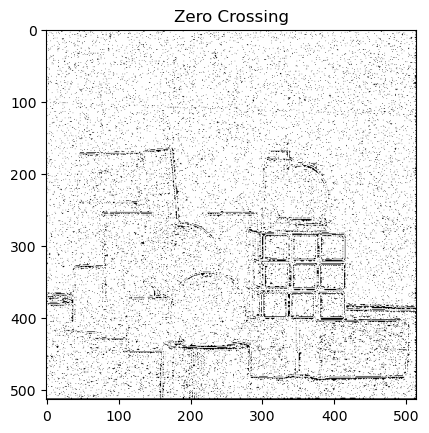

In [71]:
# Part 3. Find the Zero Crossings
import copy
laplacianKernel = np.matrix([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

zc1 = ndimage.convolve(im1, laplacianKernel)
zc2 = ndimage.convolve(im2, laplacianKernel)

#flips negatives to 0 and positives to 1
mat011 = convertToZeros(zc1)
mat012 = convertToZeros(zc2)

#adds 0 padding around all edges
padded1 = np.pad(mat011, ((1,1), (1,1)), 'constant', constant_values = 0)
padded2 = np.pad(mat012, ((1,1), (1,1)), 'constant', constant_values = 0) 

#make copy shift copy left
shiftLeft1 = np.pad(mat011, ((1,1), (0,2)), 'constant', constant_values = 0)
shiftLeft2 = np.pad(mat012, ((1,1), (0,2)), 'constant', constant_values = 0)


leftOr1 = np.logical_xor(padded1, shiftLeft1)
leftOr2 = np.logical_xor(padded2, shiftLeft2)

#make copy shift copy up
shiftUp1 = np.pad(mat011, ((0,2), (1,1)), 'constant', constant_values = 0)
shiftUp2 = np.pad(mat012, ((0,2), (1,1)), 'constant', constant_values = 0)

upOr1 = np.logical_xor(padded1, shiftUp1)
upOr2 = np.logical_xor(padded2, shiftUp2)

#make copy shift copy down
shiftDown1 = np.pad(mat011, ((2,0), (1,1)), 'constant', constant_values = 0)
shiftDown2 = np.pad(mat012, ((2,0), (1,1)), 'constant', constant_values = 0)

downOr1 = np.logical_xor(padded1, shiftDown1)
downOr2 = np.logical_xor(padded2, shiftDown2)

#make copy shift copy right
shiftRight1 = np.pad(mat011, ((1,1), (2,0)), 'constant', constant_values = 0)
shiftRight2 = np.pad(mat012, ((1,1), (2,0)), 'constant', constant_values = 0)

rightOr1 = np.logical_xor(padded1, shiftRight1)
rightOr2 = np.logical_xor(padded2, shiftRight2)

ored1 = np.logical_or(leftOr1, upOr1, downOr1)
ored1 = np.logical_or(ored1, rightOr1)
ored2 = np.logical_or(leftOr2, upOr2, downOr2)
ored2 = np.logical_or(ored2, rightOr2)

plt.imshow(mat011,cmap="Greys_r",vmin=0,vmax=1); plt.title("Laplacian 2D Block")
plt.show()

plt.imshow(ored1,cmap="Greys_r",vmin=0,vmax=1); plt.title("Zero Crossing")
plt.show()

plt.imshow(mat012,cmap="Greys_r",vmin=0,vmax=1); plt.title("Laplacian 2D Block")
plt.show()

plt.imshow(ored2,cmap="Greys_r",vmin=0,vmax=1); plt.title("Zero Crossing")
plt.show()

# Show the results on blocks image


<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


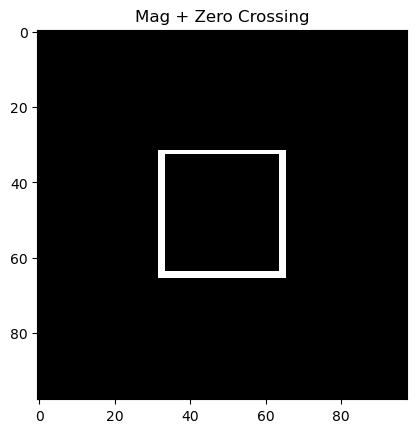

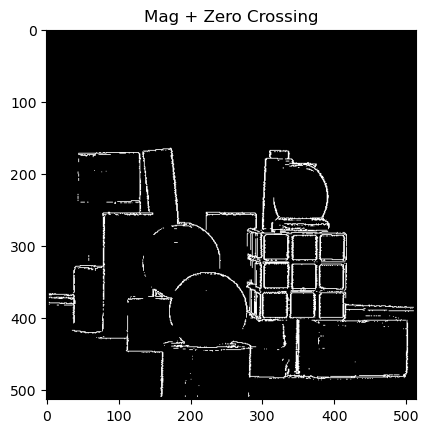

In [72]:
# Part 4. Final Solution

finalResult1 = np.logical_and(np.pad(magImage, ((1,1), (1,1)), 'constant', constant_values = 0) , ored1)
finalResult2 = np.logical_and(np.pad(magImage2, ((1,1), (1,1)), 'constant', constant_values = 0) , ored2)

plt.imshow(finalResult1,cmap="Greys_r",vmin=0,vmax=1); plt.title("Mag + Zero Crossing")
plt.show()

plt.imshow(finalResult2,cmap="Greys_r",vmin=0,vmax=1); plt.title("Mag + Zero Crossing")
plt.show()

# Show the results on blocks image


##### Part A: Write-up

<span style="color:black">I think the biggest question I have is why all the different tests are necessary when I feel like from the first test we get pretty similar results when including the laplacian. Why is it worth taking the extra computational time to combine the two result as well as find the laplacian zero crossings? The first two results are from taking the gradient magnitude and then the gradient orientation respectively. The third is taking the Laplacian zero crossing and then final combining the Laplacian and the gradient magnitude. 
PartA1: Adjusting the threshold limit definitely gives cleaner results however there is a sweet spot as too much limits the amount of detail you can see and not enough will allow noise to remain in the image
PartA2: I used cmap jet as the mode that I wanted to see the orientations in </span>



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [73]:
def toGrey(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return imgGray

In [74]:
def blur_uniform(image, kwidth = 3, kheight = 3):
    
    size = kwidth
    result = np.zeros(image.shape)
    
    for x in range(0, image.shape[0]):
        for y in range(0, image.shape[1]): 
            startIndex = int (x - ((size - 1) / 2))
            answer = np.sum(image[startIndex: x + size - 1, int((y -  ((size - 1) / 2))) : y + size - 1])
            result[x][y] = (answer - image[x][y]) / (size ** 2 -1)

            
    return result

In [75]:
def makePoints(image):
    pointsList = []
    for x in range(0, image.shape[0]):
        for y in range(0, image.shape[1]): 
            if image[x][y] == 1:
                pointsList.append((x,y))
    return pointsList

In [76]:
import math
def getPtsOfNewCircle(centerX, centerY, r, angle):
    degreeAngle = np.degrees(angle)
    circlePts=[]
    for i in range((int)(degreeAngle - 30), (int)(degreeAngle + 30)):
        x = centerX + r*math.cos(i)
        y = centerY + r*math.sin(i)
        x=int(x) + r 
        y=int(y) + r 
        circlePts.append((x,y))
    for i in range((int)(degreeAngle + 180 - 30), (int)(degreeAngle + 180 + 30)):
        x = centerX + r*math.cos(i)
        y = centerY + r*math.sin(i)
        x=int(x) + r  #These pts are skewed so it will fit in the padded accumulator
        y=int(y) + r 
        
        circlePts.append((x,y))
        
    return circlePts

In [77]:
def updateAcumulator(listOfPts, acumulator, r):
    
    for i in range(len(listOfPts)):
        x,y = listOfPts[i]
        if(x >= acumulator.shape[0]):
            x = acumulator.shape[0] - 1
        if (y >= acumulator.shape[1]):
            y = acumulator.shape[1] - 1
        acumulator[x][y] = (acumulator[x][y]) + 1 #this is my version of adding a vote I need to check to see how this should be done
        
    return acumulator

In [78]:
def findMax(array):
    maxValue = 0
    x = 0
    y = 0
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if (array[i][j] > maxValue):
                maxValue = array[i][j]
                x = i
                y = j
    return x, y, maxValue

In [79]:
# Part B - Hough Transform - code below
def houghTransform (image, r):
    image = blur_uniform(image, 4, 4)
    magGradient, orient = edgeDetect(image)
     
    magGradThresh = threshold(magGradient,.3) 
    pointsList = makePoints(magGradThresh)
    
    acumulator = np.zeros((magGradThresh.shape[0] + r, magGradThresh.shape[1] + r))
    retAcumulator = makePtCircles(pointsList, acumulator, orient, r)

    retAcumulator = retAcumulator / 300
    
    return retAcumulator



# Be sure to show all of the figures required in the description above


In [80]:
def makePtCircles(pts, acumulator, orient, r):
    for i in range(len(pts)):
        centerX, centerY = pts[i]
        circlePts = getPtsOfNewCircle(centerX, centerY, r, orient[centerX][centerY]) #FIXME: curr hardcoded for small circle
        retAcumulator = updateAcumulator(circlePts, acumulator, r)
        
    return retAcumulator

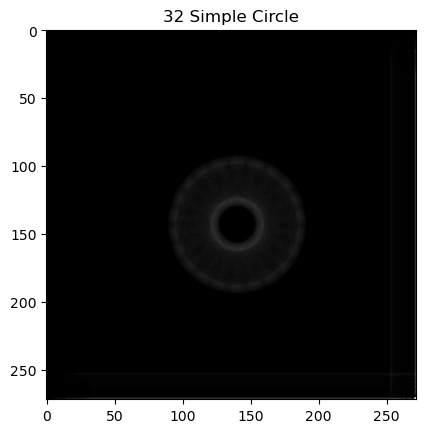

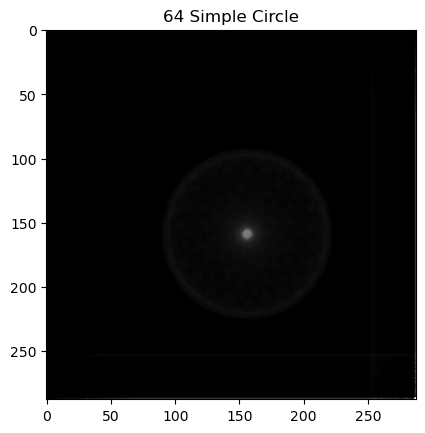

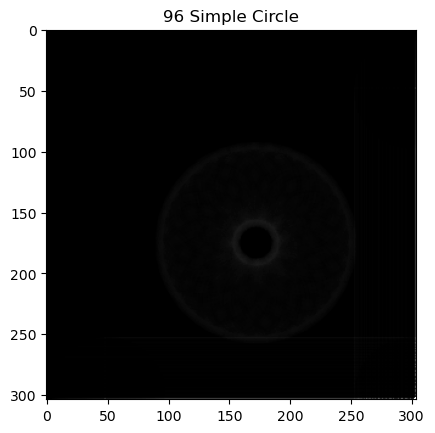

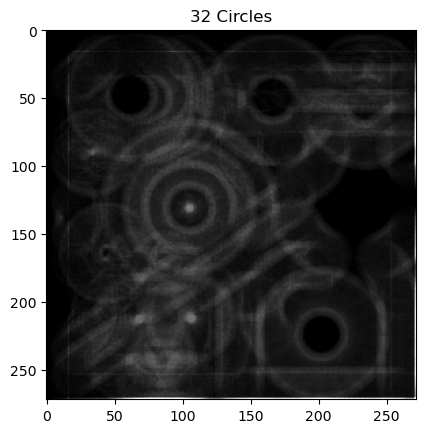

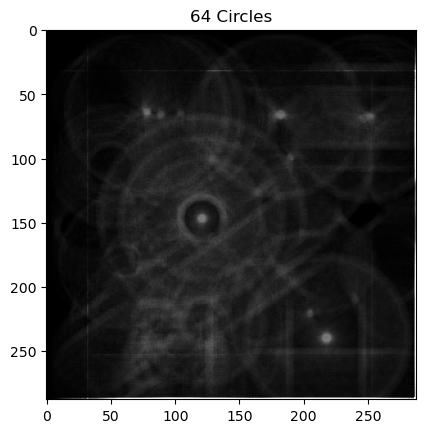

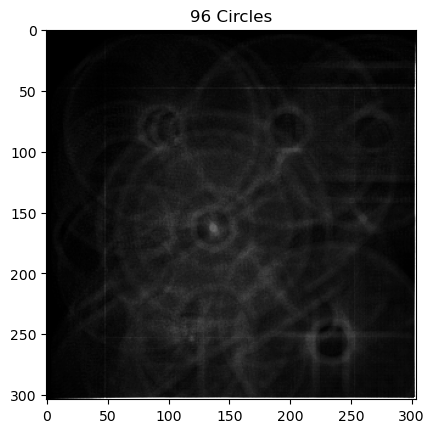

In [81]:
simpleIm = plt.imread('simplecircle.png', format = "png")
circlesIm = plt.imread('circles.png', format = "png")

smallSimpleResult = houghTransform(toGrey(simpleIm), 16)
smallCirclesResult = houghTransform(toGrey(circlesIm), 16)
mediumSimpleResult = houghTransform(toGrey(simpleIm), 32)
mediumCirclesResult = houghTransform(toGrey(circlesIm), 32)
largeSimpleResult = houghTransform(toGrey(simpleIm), 48)
largeCirclesResult = houghTransform(toGrey(circlesIm), 48)


plt.imshow(smallSimpleResult,cmap="Greys_r",vmin=0,vmax=1); plt.title("32 Simple Circle")
plt.show()
plt.imshow(mediumSimpleResult,cmap="Greys_r",vmin=0,vmax=1); plt.title("64 Simple Circle")
plt.show()
plt.imshow(largeSimpleResult,cmap="Greys_r",vmin=0,vmax=1); plt.title("96 Simple Circle")
plt.show()

plt.imshow(smallCirclesResult,cmap="Greys_r",vmin=0,vmax=1); plt.title("32 Circles")
plt.show()
plt.imshow(mediumCirclesResult,cmap="Greys_r",vmin=0,vmax=1); plt.title("64 Circles")
plt.show()
plt.imshow(largeCirclesResult,cmap="Greys_r",vmin=0,vmax=1); plt.title("96 Circles")
plt.show()


##### Part B: In my Hough Transform I originally blurred the given image. I did this to reduce noise on any images I was given so we had better lines to go off of once I did edge detection on the image. I also used the gradient orientation to find out roughly where the center of the circle was most likely to be. This in turn both saved computation time and got rid of some false positives as I had less pts to plot in the accumulator. With the accumulator I padded it with reference to the radius of the circle I was looking for this is what allowed it to find circles whose centers would be off of the image given. 